In [1]:
!pip install -Uqq fastai duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *

def search_images(temp,max_images=100):
    print(f"Searching Images for {temp}")
    return L(ddg_images(temp, max_results=max_images)).itemgot('image')

In [3]:
pwd

'C:\\Users\\khushi garg\\PyTorch'

In [4]:
cd PyTorch

[WinError 2] The system cannot find the file specified: 'PyTorch'
C:\Users\khushi garg\PyTorch


In [8]:
find = 'Hashirama Senju', 'Tobirama Senju','Hiruzen Sarutobi','Minato Namikaze','Tsunade','Kakashi Hatake','Naruto Uzumaki'
path = Path('Hokage_Naruto/Hokage')

from time import sleep
for i in find:
    destination= path/i
    destination.mkdir(exist_ok=True, parents=True)
    download_images(destination, urls=search_images(f'{i} naruto anime images'))
    sleep(10)
    resize_images(path/i, max_size=400, destination = path/i)

SyntaxError: positional argument follows keyword argument (2216859311.py, line 10)

In [7]:
failed_images=verify_images(get_image_files(path))
failed_images.map(Path.unlink)
len(failed_images)

17

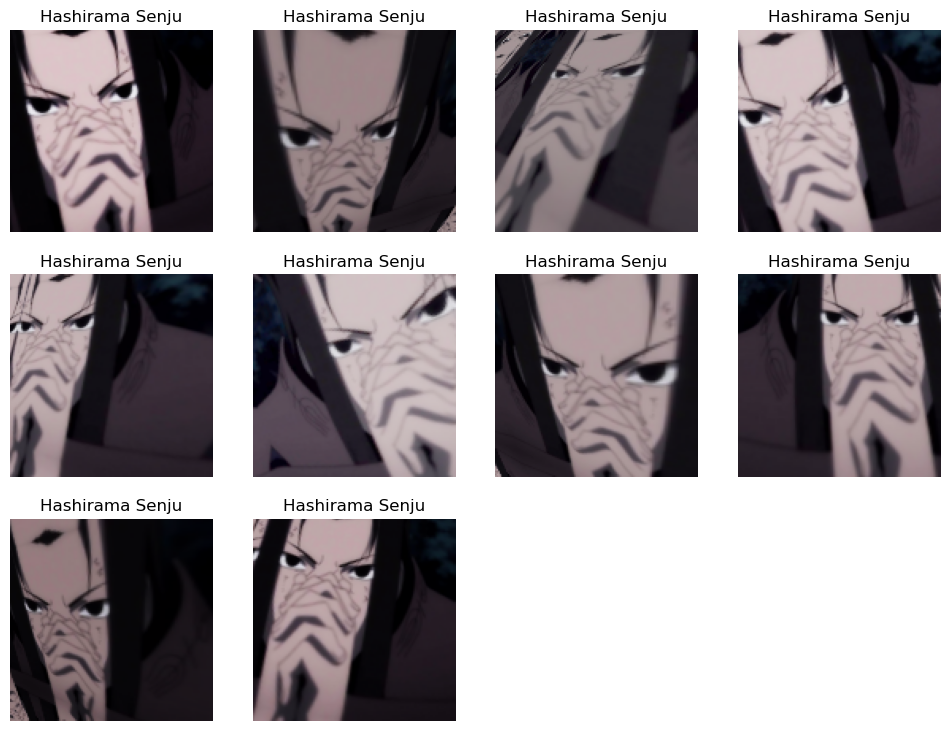

In [11]:
hokage = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2,seed =42),
    get_y = parent_label,
    item_tfms = [Resize(128)],
    batch_tfms = aug_transforms(mult=2)
).dataloaders(path,bs=32)

hokage.show_batch(max_n=10, unique = True)

In [41]:
learn = vision_learner(hokage,resnet18,metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.623441,2.129469,0.648438,00:36


epoch,train_loss,valid_loss,error_rate,time
0,1.783937,1.487584,0.554688,00:42
1,1.649520,1.100197,0.382812,00:41
2,1.417597,0.806617,0.296875,00:42
3,1.245031,0.691747,0.179688,00:42
4,1.113235,0.667988,0.203125,00:42
5,0.922640,0.654220,0.195312,00:44
6,0.809327,0.595193,0.171875,00:45
7,0.696482,0.539760,0.156250,00:48
8,0.624214,0.543870,0.171875,00:46
9,0.562415,0.536445,0.156250,00:48


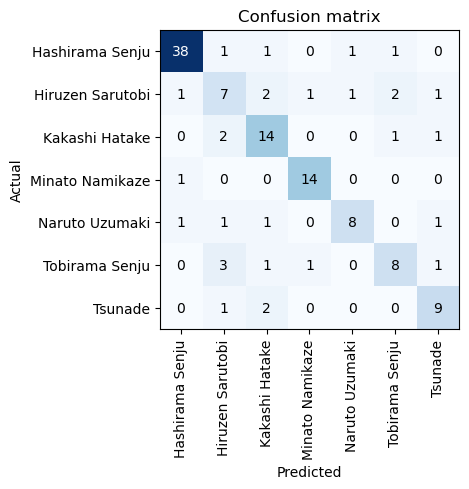

In [14]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

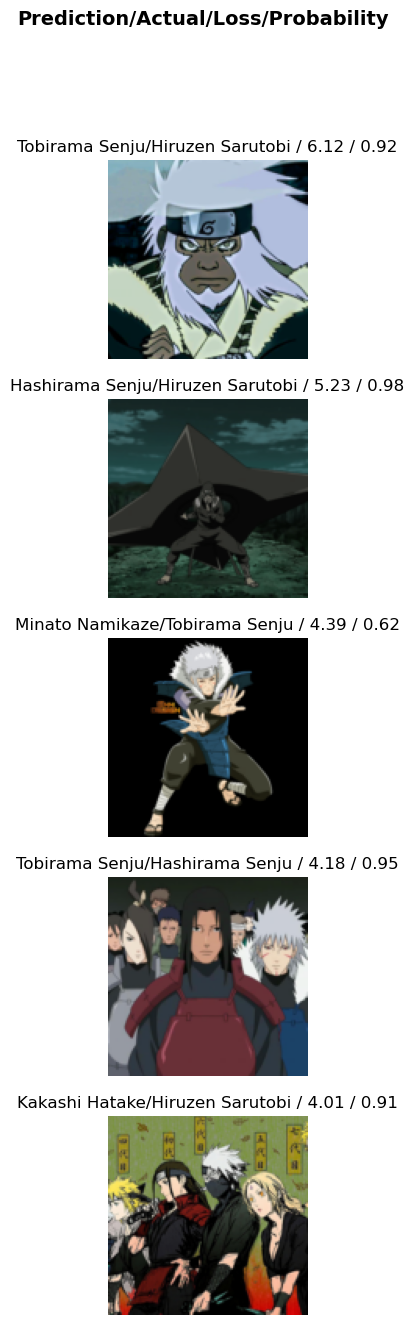

In [15]:
interpret.plot_top_losses(5,nrows=5)

In [18]:
from fastai.vision.widgets import *
clean = ImageClassifierCleaner(learn)
clean

In [35]:
for f in clean.delete():
    clean.fns[f]

In [36]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6C3A-19AD

 Directory of C:\Users\khushi garg\PyTorch

23-06-2023  12:39    <DIR>          .
23-06-2023  07:37    <DIR>          ..
23-06-2023  10:22    <DIR>          .ipynb_checkpoints
23-06-2023  11:11            12,803 001100d9-38c3-41b3-9a68-01c25e108629.jpg
23-06-2023  11:10             8,827 0019a828-c9f7-4274-bc5f-dab5755c3032.jpg
23-06-2023  11:08            21,701 00246b90-428c-4df6-b032-ac22d9ff2f84.jpg
23-06-2023  11:10            22,278 002481f3-f865-4aca-8980-0df6c02d64b1.jpg
23-06-2023  11:10           103,704 005ab841-447c-420a-8257-e4208b5d0758.png
23-06-2023  11:13            83,629 00a1f1cd-d42e-4946-8cc1-eb8ecd943148.png
23-06-2023  11:10           101,329 00c1e2b5-a342-4754-9676-b8044dba4673.png
23-06-2023  11:11            23,479 00d6f834-3c06-4858-b269-4b35454fa762.jpg
23-06-2023  11:10            18,954 00ddc0f5-369a-453e-b4d4-4261f07bdf74.jpg
23-06-2023  11:12            37,923 00e5c7ce-1323-40b6-b6fe-b0406d28f8

In [43]:
categories= ('Hashirama Senju', 'Tobirama Senju','Hiruzen Sarutobi','Minato Namikaze','Tsunade','Kakashi Hatake','Naruto Uzumaki')
def predict_this(img):
    who_is_this,_,probs = learn.predict(PILImage.create(img))
    return dict(zip(categories,map(float,probs)))

In [51]:
who_is_this,_,probs = learn.predict(PILImage.create('tobi.jfif'))
print(f'This is {who_is_this}.')
print(f'{probs[5]}')

This is Tobirama Senju.
0.9653366208076477


In [52]:
who_is_this,_,probs = learn.predict(PILImage.create('naruto.png'))
print(f'This is {who_is_this}.')
print(f'{probs[4]}')

This is Naruto Uzumaki.
0.9998227953910828


In [53]:
who_is_this,_,probs = learn.predict(PILImage.create('saru.jfif'))
print(f'This is {who_is_this}.')
print(f'{probs[1]}')

This is Hiruzen Sarutobi.
0.9557494521141052


In [54]:
pip install gradio

     ---------------------------------------- 19.7/19.7 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 191.7/191.7 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 288.4/288.4 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 124.7/124.7 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 471.5/471.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB 3.1 MB/s eta 0:00:00
     ---------------

In [55]:
import gradio as gr

In [56]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['tobi.jfif','naruto.png','saru.jfif']

intf = gr.Interface(fn=predict_this, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
